$Kode \space : \space C++\space \space \space , \space \space \space  Dato \space : \space 30.09.2019 \space \space \space , \space\space\space Emne \space : \space Fys3150\space \space \space , \space \space \space Navn \space : \space Roshan \space Azam \space , \space Erlend \space Akre $

# Egenverdi problemer, moderling av en bøyd bjelke.  Elektroner i en tredimensjonal harmonsisk oscillator brønn. 

# Abstrakt

I dette projektet har vi tatt for oss 3 fysiske problemer, vi ser på en oscillerende bjelke, potensialet fra et elektron og potensialet fra to elektroner. Problemene kan løses på relativt lik måte, og vi løser de ved å sette diffrensialligningene på matrise form for så å stå igjen med et egenverdiprobelm. Når diffensiallginingene er på matrise form finner vi løsningen ved å finne egenverdiene til matrisen. 

For å løse egenverdiene til matrisene har vi utviklet en egen kode som tar i bruk Jacobi rotasjon for å tilnærme seg egenverdiene til matisen. Videre sammenlikner vi de numeriske og analytiske resultatene, og effektiviteten til algoritmen sammenlignet med algoritmen til Armadillo. 

Sist men ikke minst har vi laget et GitHub repository som inneholder kildekoden som vi har utviklet i dette projektet, i tillegg til et par håndplukkede resultater som skal brukte til å forsøke å vise at koden virker som den skal. GitHub repositoryet skal også vise en ganske detaljert logg av utviklingen av koden. GitHub reposetory finner du her:

[https://github.com/Erlendak/FYS3150_Project_2](https://github.com/Erlendak/FYS3150_Project_2)

Hvis du ønsker å clone reposetory kan du bruke denne leken; 

[https://github.com/Erlendak/FYS3150_Project_2.git](https://github.com/Erlendak/FYS3150_Project_2.git)


# Introduksjon

Hensikten med dette projektet er å utvikle en kode basert på en kjent algoritme, få en god forståelse av hvordan algoritmen virker, og kunne bruke algoritmen på praktiske problemer. Derfor tar vi for oss 3 separate fysiske problemer som løses ved hjelp av koden vi har utviklet. Sammen med unittestene viser dette oss at koden virker som den skal, og hvordan koden anvendes på praktiske problemer. 

Først tar vi for oss en bjelke der begge ender er festet til ett fast og solid punkt, rent praktisk kan dette være en vegg. Deretter påfører vi bjelken ett arbeid slik at bjelken blir bøyd, vi antar at bjelken er absolutt elastisk og dermed vil den oppføre seg som en oscillernede fjær. Under modeleringene ser vi bort fra friksjon.

Det viser seg at metoden er ganske sterk, siden vi kan også brukte den til å løse kvantemekaniske problemer. Vi begynner med å se på et elektron som beveger i et elektrisk felt som presser elektronet inn mot et nullpunkt, ved nullpunktet er summen av feltet null og dette gjør at bevegelsen til elektronet i systemet vil oppføre seg som en oscillator. 

Vi tar problemet med elektronet videre i det siste problemet vi ser på, nå ser vi ikke bare på ett elektron, men 2 elektroner i det samme systemet. Ved å ha flere elektroner gjør vi at elektronene vil påvike hverandre og ikke bare bli påvirket av det statiske elektriske feltet til systemet. Vi sammenlikner også resultatene fra systemet med ett elektron, for å finne ut hvordan problemet utvikler seg for 2 elektroner i forhold til 1 elektron. 

Dette projektet viser oss at det er en enorm fordel å skalere likningene våre, dette gir oss muligheten til å holde orden på enhetene. Det er også en fordel fordi vi konstruere én generell diffensialligning som vi kan bruke til å sette opp Toeplitz tridiagonale matrise, som vi videre bruker for å løse likningene i alle problemene med minimale endringer.

Siden vi har skalert ligningene så løser vi for et generelt system, altså ikke spesefikke systemer. Dette gjør at løsningen vil være avhengige av systemet fysikalske egenskaper. Vi kan dermed løse systemet først generelt, og dermed skalere systemet opp med egenverdien til det spesefikke systemet, eller bruke egenverdien til en generell løsning til å finne passende fysikalske egenskaper. Dette gjør oppgaven til et egenverdiproblem.

Jacobi rotasjon er ett av måtene vi kan diagonalisere en matrise på, og det er en sikker metode du kan bruke 
på ekte symmetriske matriser. Siden vi ender opp med en diagonal matrise etter at vi har
brukt Jacobi rotation er det bare å lese av egenverdiene på diagonalen. Vi vet at egenverdiene
blir bevart når vi bruker Jacobi, så egenverdiene på diagonalen vil være de samme
som de i den initielle matrisen vår. 

Metoden går ut på at vi roterer matrisen flere ganger ved hjelp av en sekvens av ortogonale similære transformasjoner. Hver rotasjon burde fjerne ett ikke-diagonalt element fra matrisen, og selv om dette elementet ikke blir 0, 
så blir det mindre og mindre, slik at vi kan sette en viss toleranse for når vi ikke teller med 
elementet lenger. En negativ side ved Jacobi rotasjon er at for større matriser kan det ta veldig
lang tid å kjøre gjennom.

# Formalisme

 Ved hjelp av Hookes lov uttrykker vi kraften på bjelken, og med Newtons andre lov lager vi dermed et uttrykk for hvordan bjelken vil bevege seg: 

$$\gamma \frac{d^2 u(x)}{dx^2} = -F u(x)$$

Vi definer origo til koordinatsystemet til å være i det ene festet til bjelken, så setter vi x-aksen til å bevege seg langs med bjelken. Bjelken har lengde L, systemet definert for x $\in$ $[0,L]$. Siden bjelken er festet i begge endene så vil utslaget i endene alltid være lik null. Dette gir oss Dirichlet grense betingelse: u(0) = u(L) = 0 og bjelken blir påvirket av kraften F i punktene x = (0 , L).

For å gjøre simuleringene introduserer vi dimensjonsløse variabler:

$$ \frac{d^2 u(\rho)}{d\rho^2} = -\frac{FL^2}{\gamma} u(\rho),\hspace{1cm} \rho = \frac{x}{L}, \hspace{1cm} \rho \in [0,1] $$

$\gamma$ representerer bjelkens materialske egenskaper, altså hvor motstandsdyktig bjelken er til å unngå å bøye seg. F er kraften som bjelken blir påvirket av i festepunktene x = (0,L). Når vi skal se på spesefikke tilfeller så vil $\gamma$, F og L som regel være kjent, eventuelt kan vi finne en av dem ved å se på hvordan bjelken oppfører seg. Vi ser at $\frac{FL^2}{\gamma}$ er avgjørende for hvordan systemet vil bevege seg, dette gjør at $\frac{FL^2}{\gamma}$ fungerer som en egenverdi for differensiallikningen, dette gir oss: 


$$\frac{d^2 u(\rho)}{d\rho^2} = -\frac{FL^2}{\gamma} u(\rho) = -\lambda u(\rho)$$

Hvis vi diskretiserer differensiallikningen får vi: 

$$u''=\frac{u(\rho+h) -2u(\rho) +u(\rho-h)}{h^2} +O(h^2),$$



Vi kaller antall steg i den numeriske løsningen N og definerer dermed stegstørrelsen:

$$h = \frac{\rho_{max}-\rho_{min}}{N}$$

på grunn av definisjonen av $\rho$ så vil $\rho_{max} $ være 1 og $\rho_{min}$ være 0. 
dette betyr at at $\rho$ vil være definert som: 
 
$$\rho(i) = \rho_0 + ih \hspace{2cm} i=1,2,\dots , N. $$

Dette gir oss den diskretiserte differensiallikningen:

$$ -\frac{u(\rho_i+h) -2u(\rho_i) +u(\rho_i-h)}{h^2}  = \lambda u(\rho_i),\hspace{1cm} \implies \hspace{1cm}-\frac{u_{i+1} -2u_i +u_{i-1} }{h^2}  = \lambda u_i$$

Egenverdiene har den analytiske løsningen gitt ved: 

$$ \lambda_j = d+2a\cos{(\frac{j\pi}{N+1})} \hspace{0.1cm} j=1,2,\dots N $$

Nå kan vi skrive differensiallikningene på matriseform: 

$$ \begin{bmatrix} d& a & 0   & 0    & \dots  &0     & 0 \\
                                a & d & a & 0    & \dots  &0     &0 \\
                                0   & a & d & a  &0       &\dots & 0\\
                                \dots  & \dots & \dots & \dots  &\dots      &\dots & \dots\\
                                0   & \dots & \dots & \dots  &a  &d & a\\
                                0   & \dots & \dots & \dots  &\dots       &a & d\end{bmatrix} 
                                 \begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ \vdots \\ u_{N-2} \\ u_{N-1}\end{bmatrix} = \lambda \begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ \vdots \\ u_{N-2} \\ u_{N-1}\end{bmatrix}$$

Hvis vi setter inn for diffrensialligningen vil dette blir en matrise vi kan løse ved hjelp av jacobi rotasjon som vi tar opp senere i rapporten:


$$ \underline{\underline{ \begin{bmatrix}
\frac{2}{h^2}  & -\frac{1}{h^2} & 0              & 0              & \dots          & 0             & 0 \\
-\frac{1}{h^2} & \frac{2}{h^2}  & -\frac{1}{h^2} & 0              & \dots          & 0             & 0 \\
0              & a              & \frac{2}{h^2}  & -\frac{1}{h^2} & 0              & \dots         & 0 \\
\vdots          & \ddots          & \ddots          & \ddots          & \ddots          & \ddots         & \vdots \\
0              & \ddots          & \ddots          & \ddots          & -\frac{1}{h^2} & \frac{2}{h^2} & -\frac{1}{h^2} \\
0              & \dots          & \dots          & \dots          & \dots & -\frac{1}{h^2} & \frac{2}{h^2}\end{bmatrix}  \begin{bmatrix} 
u_1 \\
u_2 \\ 
u_3 \\
\vdots \\
\vdots \\
u_{N-2} \\
u_{N-1} \end{bmatrix} = \lambda \begin{bmatrix}
u_1 \\
u_2 \\
u_3 \\
\vdots \\
\vdots \\
u_{N-2} \\
u_{N-1}\\
\end{bmatrix} }}$$



Videre bruker vi Jacobi rotasjon for å løse problemet. 

Når vi skal se på elektronet som beveger seg i et fanget system gjør vi følgene antagelser: Elektronet beveger seg i et statisk felt som frastøter seg elektronet, slik at elektronet blir presset mot et nullpunkt der summen av feltene er null. Vi antar at feltet har en form for kulesymmetri, det medfører at vi kan skrive posisjonen til elektronet ved hjelp av sfæriske koordinater der potensialet kun er avhengige av radiusen fra nullpunktet til elektronet. Da kan vi bruke Schroedingers likning til å beskrive den totale energien i systemet, uttrykt ved hjelp av summen av den kinetiske enerigen og det elektriske potensialet V(r) til systemet:


$$ E R(r) = -\frac{\hbar^2}{2 m} \left ( \frac{1}{r^2} \frac{d}{dr} r^2 \frac{d}{dr} - \frac{l (l + 1)}{r^2} \right )R(r) + V(r) R(r) $$


Potesialet kan uttrykkes ved hjelp av $\frac{1}{2}kr^2$ der k er uttrykkt ved hjelp av $k = m \omega^2$, hvor $\omega$ er frekvens systemet oscillerer med. Dette gjør at vi kan skrive energien til systemet uttrykt ved hjelp av $\omega$ ; 

$$
E_{nl}=  \hbar \omega \left(2n+l+\frac{3}{2}\right),\hspace{3cm} n=0,1,2,\dots, \hspace{3cm} l=0,1,2,\dots $$

Hvor kvante tallet l referer til elektronets orbitale bevegelsesmengde. Siden vi holder oss til sfæriske koordianter så skriver vi R som $\frac{1}{r}u(r)$ dette gir oss: 

$$  -\frac{\hbar^2}{2 m} \frac{d^2}{dr^2} u(r) + \left ( V(r) + \frac{l (l + 1)}{r^2}\frac{\hbar^2}{2 m} \right ) u(r)  = E u(r) $$

så definerer vi Dirichlet grensene u(0)=$u(\infty)$ = 0, og så skalerer vi ligningen med hensyn på r. 
$\rho = \frac{1}{\alpha}r$ hvor $\alpha$ er en konstant lengde, dette gir oss uttrykket:

$$ -\frac{\hbar^2}{2 m \alpha^2} \frac{d^2}{d\rho^2} u(\rho) + \left ( V(\rho) + \frac{l (l + 1)}{\rho^2} \frac{\hbar^2}{2 m\alpha^2} \right ) u(\rho)  = E u(\rho) $$

I dette projektet holder vi oss til at det kvante mekaniske orbitale bevegelsesmengden er 0, og for potensialet setter vi inn $V(\rho) = (1/2) k \alpha^2\rho^2$. Dette gir oss uttrykket:

$$-\frac{\hbar^2}{2 m \alpha^2} \frac{d^2}{d\rho^2} u(\rho) + \frac{k}{2} \alpha^2\rho^2u(\rho)  = E u(\rho)\hspace{1cm} \bigg| \space \cdot \space \frac{2m\alpha^2}{\hbar^2} $$ 

$$ -\frac{d^2}{d\rho^2} u(\rho) + \frac{mk}{\hbar^2} \alpha^4\rho^2u(\rho)  = \frac{2m\alpha^2}{\hbar^2}E u(\rho) $$

Så setter vi konstanten $\alpha$ til: 

$$ \frac{mk}{\hbar^2} \alpha^4 = 1 \hspace{1cm} \implies \hspace{1cm} \alpha = \left(\frac{\hbar^2}{mk}\right)^{1/4}$$

Dette gir oss:

$$ -\frac{d^2}{d\rho^2} u(\rho) +  \rho^2u(\rho)  = \frac{2m\alpha^2}{\hbar^2}E u(\rho) $$

Her får vi at potensialet er avhengige av systemets konstanter E, m, $\hbar$ og $\alpha$. Dette kan da også uttrykkes som et egenverdiproblem hvor egenverdiene er gitt ved:

$$ \lambda = \frac{2m\alpha^2}{\hbar^2}E $$

Dette gir oss differensiallikningen:

$$-\frac{d^2}{d\rho^2} u(\rho) + \rho^2u(\rho)  = \lambda u(\rho) $$

Så utfører vi en diskretisjon for differensialigningen ;

$$ -\frac{u(\rho_i+h) -2u(\rho_i) +u(\rho_i-h)}{h^2}+\rho_i^2u(\rho_i)  = \lambda u(\rho_i), \hspace{2cm} V_i = \rho^2_i $$

$$-\frac{u_{i+1} -2u_i +u_{i-1}}{h^2}+\rho_i^2u_i=-\frac{u_{i+1} -2u_i +u_{i-1} }{h^2}+V_iu_i  = \lambda u_i $$

Hvor $\rho$ går fra 0 mot $\infty$, men under diskretisjonen tester vi for forskjellige størrelser av $\rho$ for å tilnærme oss $\infty$. Dette gir oss stegstørrelsen: 
$$ h = \frac{\rho_N-\rho_0 }{N}, \hspace{3cm} \rho_0 = 0, \hspace{1cm}\rho_n = x, \hspace{1cm} \rho_i= \rho_0 + ih \hspace{1cm} i=1,2,\dots , N. $$

Dette gir oss diagonalelementet $d_i=\frac{2}{h^2}+V_i$. Elementene som er på tridiagonalen men ikke diagonalen blir uttryket ved $e_i=-\frac{1}{h^2}$. Dette gjør at vi kan skrive diffrensialligninen på matrise form:

$$\begin{bmatrix}
d_1 & e_1 & 0   & 0    & \dots  &0     & 0 \\
e_1 & d_2 & e_2 & 0    & \dots  &0     &0 \\
0   & e_2 & d_3 & e_3  &0       &\ddots & 0\\
\vdots  & \vdots & \ddots & \ddots  &\ddots      &\ddots & \vdots\\
0   & \vdots & \vdots & \ddots  &\dots  e_{N-3}     &d_{N-2} & e_{N-2}\\
0   & 0 & 0 & \dots  &\dots   &e_{N-2} & d_{N-1}\\
\end{bmatrix} \begin{bmatrix}
u_{1} \\
u_{2} \\
\vdots\\
\vdots\\
\vdots\\
u_{N-1}
\end{bmatrix}=\lambda \begin{bmatrix}
u_{1} \\
u_{2} \\
\vdots\\
\vdots\\ 
\vdots\\
u_{N-1}
\end{bmatrix}$$


$$\begin{bmatrix}
\frac{2}{h^2}+V_1 & -\frac{1}{h^2} & 0   & 0    & \dots  &0     & 0 \\
-\frac{1}{h^2} & \frac{2}{h^2}+V_1 & -\frac{1}{h^2} & 0    & \dots  &0     &0 \\
0   & -\frac{1}{h^2} & \frac{2}{h^2}+V_3 & -\frac{1}{h^2}  &0       &\ddots & 0\\
\vdots  & \ddots & \ddots & \ddots  &\ddots      &\ddots & \vdots\\
0   & \dots & \dots & \dots  &\dots  -\frac{1}{h^2}    & \frac{2}{h^2}+V_{N-2} & -\frac{1}{h^2}\\
0   & \dots & \dots & \dots  &\dots   & -\frac{1}{h^2} & \frac{2}{h^2}+V_{N-1}\\
\end{bmatrix} \begin{bmatrix}
u_{1} \\
u_{2} \\
\vdots\\
\vdots\\
\vdots\\
u_{N-1}
\end{bmatrix}=\lambda \begin{bmatrix}
u_{1} \\
u_{2} \\
\vdots\\
\vdots\\ 
\vdots\\
u_{N-1}
\end{bmatrix}$$

Vi kan finne egenverdiene analytisk 
$$ d_iu_i+e_{i}u_{i-1}+e_{i}u_{i+1}  = \lambda u_i, $$

Vi ser nå på det siste problemet, hvor vi ser på 2 elektroner som er fanget i et sfærisk avstøtende felt hvor vi har et nullpunkt i systemets sentrum som vi definerer som origo. Akkurat som i forrige problem. Vi starter med å se på likningen for et elektron: 

$$ -\frac{\hbar^2}{2 m} \frac{d^2}{dr^2} u(r) + \frac{1}{2}k r^2u(r)  = E^{(1)} u(r)$$

Her uttrykker $ E^{(1)}$ energien for kun et elektron. Vi ser så på Schroedingers likning for 2 elektroner, men vi ser bort fra frastøtende interaksjoner mellom dem. Vi uttrykker beveglesen til elektronene samlet: $u(r_1,r_2)$ der $r_1$ er avstanden fra nullpunktet og til elektron 1. R_2 beskriver avstanden til elektron 2. Energien $E^{(2)}$ beskriver energien til begge elektronene. Dette gir oss:

$$ \left(  -\frac{\hbar^2}{2 m} \frac{d^2}{dr_1^2} -\frac{\hbar^2}{2 m} \frac{d^2}{dr_2^2}+ \frac{1}{2}k r_1^2+ \frac{1}{2}k r_2^2\right)u(r_1,r_2)  = E^{(2)} u(r_1,r_2) $$

Videre uttrykker vi forskjellen mellom avstanden til elektronene som $r = r_1 - r_2$ og massesenteret til elektronene ved $R = \frac{r_1 + r_2}{2}$. Dette kan vi bruke som koordinater for systemet vårt gitt ved: 

$$ \left(  -\frac{\hbar^2}{m} \frac{d^2}{dr^2} -\frac{\hbar^2}{4 m} \frac{d^2}{dR^2}+ \frac{1}{4} k r^2+  kR^2\right)u(r,R)  = E^{(2)} u(r,R) $$

Så kan vi bruke en tilnærming for u(r,R) og $E^{(2)}$ for å skille avhengigheten av r og R, dette gir oss: 

$$ u(r,R) = \psi(r)\phi(R), \hspace{3cm}  E^{(2)}= E_r + E_R.$$

Siden elektronene beveger seg i samme system er det nødvendig at vi beskriver de frastøtende interaksjonene mellom dem, dette har vi uttrykket ved hjelp av:

$$V(r_1,r_2) = \frac{\beta e^2}{|\mathbf{r}_1-\mathbf{r}_2|} =\frac{\beta e^2}{r}, \hspace{1cm} \beta e^2=1.44 eVnm.$$

Dette gir oss:

$$ \left(  -\frac{\hbar^2}{m} \frac{d^2}{dr^2}+ \frac{1}{4}k r^2+\frac{\beta e^2}{r}\right)\psi(r)  = E_r \psi(r)$$

Dette kjenner vi igjen fra tidligere, så igjen skalerer vi ligningene med $\rho$ slik at vi får dimensjonsløse variabler; 

$$-\frac{d^2}{d\rho^2} \psi(\rho) + \frac{1}{4}\frac{mk}{\hbar^2} \alpha^4\rho^2\psi(\rho)+\frac{m\alpha \beta e^2}{\rho\hbar^2}\psi(\rho)  = \frac{m\alpha^2}{\hbar^2}E_r \psi(\rho), \hspace{2cm} \rho = \frac{r}{\alpha} $$

For å gjøre uttrykket lettere å behandle definerer vi frekvensen $\omega_r $ som:
$$\omega_r^2=\frac{1}{4}\frac{mk}{\hbar^2} \alpha^4$$
og så definerer vi konstanten $\alpha$ som:
$$ \alpha = \frac{\hbar^2}{m\beta e^2} \hspace{3cm} \implies \hspace{3cm} \frac{m\alpha \beta e^2}{\hbar^2}=1 $$
Dette betyr at vi kan uttrykke Schroedingers likning slik:

$$ -\frac{d^2}{d\rho^2} \psi(\rho) + \omega_r^2\rho^2\psi(\rho) +\frac{1}{\rho} = \frac{m\alpha^2}{\hbar^2}E \psi(\rho) $$

Her ser vi at vi kan bruke $\frac{m\alpha^2}{\hbar^2}E$ som en egenverdiene for systemet, dette vil da gi oss ; 

$$ -\frac{d^2}{d\rho^2} \psi(\rho) + \omega_r^2\rho^2\psi(\rho) +\frac{1}{\rho} = \lambda \psi(\rho) $$



$$\frac{\psi(\rho_1+h) -  2\psi(\rho_i) + \psi (\rho_i-h) }{h^2} +\omega_r^2\rho_i^2 \psi(\rho_i)+ \frac{1}{\rho_i}= \lambda \psi(\rho_i)$$

Dette gir oss diagonalelementet $d_i=\frac{2}{h^2} +\omega_r^2\rho_i^2  + \frac{1}{\rho_i}$. Elementene som er tridiagonale men ikke-diagonale blir uttryket ved $e_i=-\frac{1}{h^2}$. Dette gjør at vi kan skrive differensiallikningen på matrise form:

$$\begin{bmatrix}
d_1 & e_1 & 0   & 0    & \dots  &0     & 0 \\
e_1 & d_2 & e_2 & 0    & \dots  &0     &0 \\
0   & e_2 & d_3 & e_3  &0       &\ddots & 0\\
\vdots  & \vdots & \ddots & \ddots  &\ddots      &\ddots & \vdots\\
0   & \vdots & \vdots & \ddots  &\dots  e_{N-3}     &d_{N-2} & e_{N-2}\\
0   & 0 & 0 & \dots  &\dots   &e_{N-2} & d_{N-1}\\
\end{bmatrix} \begin{bmatrix}
u_{1} \\
u_{2} \\
\vdots\\
\vdots\\
\vdots\\
u_{N-1}
\end{bmatrix}=\lambda \begin{bmatrix}
u_{1} \\
u_{2} \\
\vdots\\
\vdots\\ 
\vdots\\
u_{N-1}
\end{bmatrix}$$



$\space$

Nå har vi satt opp et egenverdiproblem og kan bruke Jacobi rotasjon til å få ut en diagonalmatrise og løse
likningen vi har satt opp. Jacobi rotasjon virker ved at vi roterer en symmetrisk,ekte matrise, og en rotasjon
vil fjerne ett ikke-diagonalt element. Jacobi rotasjon går ut på at vi velger en toleranse epsilon, som skal være et
veldig lite tall. Dette er fordi de ikke-diagonale elementene ikke går direkte til null, men de blir mindre og mindre. 
Etter dette setter vi opp en while løkke som kjører til vi enten har alle ikke-diagonale elementene lik null,
eller til vi når en maks iterasjon som vi har satt selv. Nå kan vi finne $\tau = (a_{ll}-a_{kk})/2a{kl}$, tan(), cos() og sin().
Vi gjør så en similær transform for dette settet med (k,l) verdier, og vi får en ny rotert matrise. Vi gjør dette 
om igjen helt til alle ikke-diagonal elementene i matrisen er like 0.

Hvis vi gjennomfører en unitær tranformasjon på en matrise så vil
vi beholde ortogonalitet og prikkproduktet til matrisen, og egenverdiene vil også bli beholdt. 
Dette er viktig når vi bruker Jacobi rotasjonen, siden det betyr at vi vil beholde de samme egenverdiene
for den ferdig roterte matrisen som vi hadde i matrisen som vi satt inn for å rotere. Dette er fordi 
Jacobi rotasjonen er en sekvens av unitære transformasjoner som vi gjør på matrisen. Dette betyr også 
at selv om egenvektorene forandrer seg når vi roterer matrisen, så vil de beholde ortogonalitet og 
prikk produkt vil være bevart, og det er disse egenskapene ved Jacobi rotasjonen som gjør at vi kan bruke
den til å løse problemet vårt.

$$\begin{bmatrix}
v_{i,1 } \\
v_{i,2} \\
\vdots \\
v_{i,n} \end{bmatrix}$$

Så antar vi en ortogonal basis noe som vil si at:

$$v^T_j v_i = δ_{ij} $$

$$w_i = U v_i$$

U er orotgonal og hermitisk

$$w_j^T w_i = w^T_J U v_i$$
$$w_j^T w_i = (U v_j)^T U v_i$$

og siden U er hermitisk så vil $U^T  U$ være identites matrisen 

$$w_j^T w_i = v_j^T U^T  U v_i$$

$$w_j^T w_i = v_j^T I v_i$$
Dette er det vi skulle frem til: 

$$\underline{\underline{w_j^T w_i = δ_{𝑖𝑗}}}$$


For å sjekke at programmene våre fungerer som de skal har vi laget noen tester. De testene vi har er: En test for å sjekke at vi får riktig egenverdier når vi roterer en matrise. Her har vi sjekket at diagonalelementene er de samme som vi får ut når vi diagonaliserer matrisen analytisk. Vi har en test for å sjekke om egenverdiene til matrisen er de samme før og etter vi har rotert matrisen, fordi vi vet at de må være de samme. Til slutt tester vi at funksjonen som skal finne det største ikke-diagonale tallet faktisk finner det største ikke-diagonale tallet.

# Resultat

### Resultater fra bjelke

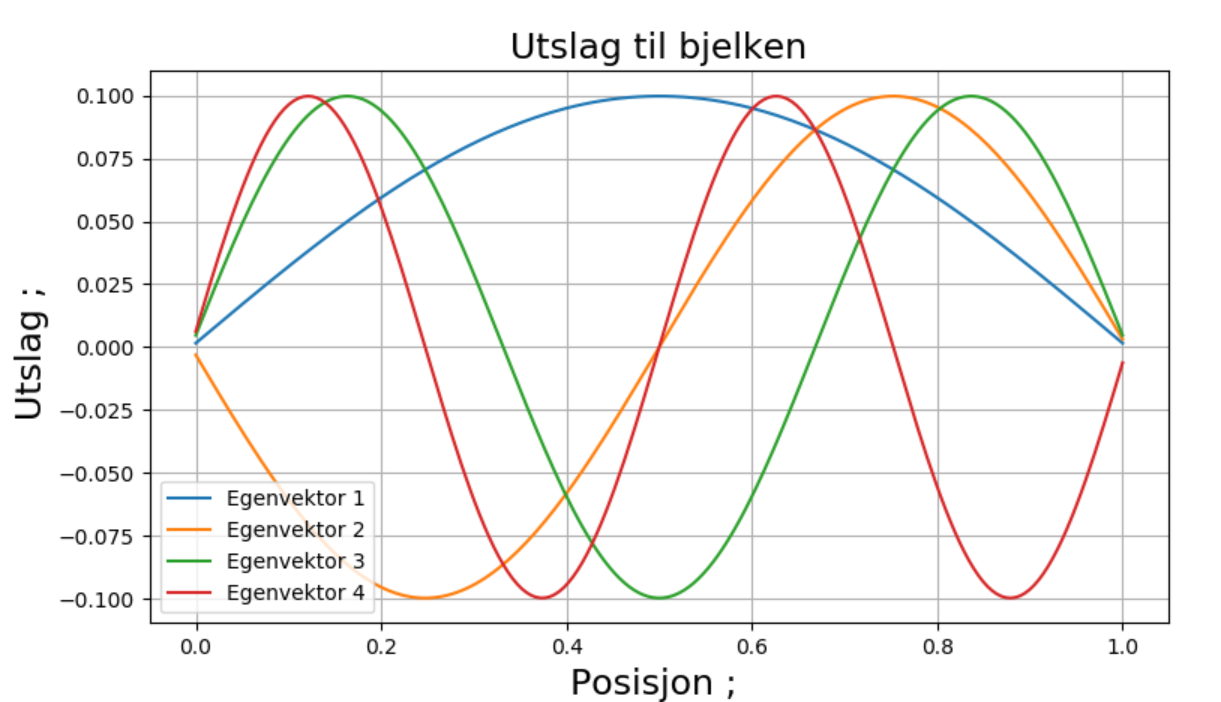
#### Figur(1)
Plott av de fire første egenvektorene til bjelken. Vi har sortert egenverdiene etter størrelse og sortert egenvektorene sammen med disse. y-akse gir utslag og x-akse gir posisjon på bjelken, som går fra 0 til 1.

| Egenverdi N = 200 | Analytisk | Toleranse ; $1\cdot10^{-1}$  | Toleranse ; $1\cdot10^{-8}$  | Toleranse ; $1\cdot10^{-12}$ | Armadillo |
| --- | --- | --- |--- |--- |--- |
| $\lambda_1$ | 9.77144 | 9. 7715 |9. 7714 |  9. 7714 | 9. 7714 |
| $\lambda_2$ | 39.0834 | 39. 083 |39. 083 | 39. 083 |39. 083 |
| $\lambda_3$ | 87.9287 | 87. 929 |87. 929 | 87. 929 | 87. 929 |
| $\lambda_4$ | 156.295 | 156. 30 |156. 30 | 156. 30 |  156. 30 | 
| $\lambda_5$ | 244.167 | 244. 17 |244. 17 | 244. 17 | 244. 17 |
| Tid         |    0 s    | 15. 354 s |22. 969 s | 25. 474 s | 0.111 s |
| Iterasjoner |    200    | 47 266 |70 859  | 78 685 | - |


#### Tabell(1)
Tabell for egenverdiene for N = 200 for programmet som løser for en bjelke. Vi har analytiske egenverdier og vi har egenverdier for forskjellige toleranser for de ikke-diagonale elementene når vi roterer. Vi har også satt inn egenverdiene som armadillo sin eig_sym funksjon gir oss. I tillegg har vi tid og antall iterasjoner hver av disse gir oss.

### Resultater fra ett elektron

| Egenverdi| Analytisk | n = 5  | n = 100 |n = 200 |
| --- | --- | --- |--- |--- |
| $\lambda_1$ | 3 | 0.4961 |2.9968 |  2.9992 |
| $\lambda_2$ | 7 | 0.4990 |6.9843 | 6.9961 |
| $\lambda_3$ | 11 |  16.5008 |  10.962 | 10.990 |
| $\lambda_4$ | 15 | 36.5009 | 14.929 | 14.982 |
| $\lambda_5$ | 19 | 64.5032 | 18.886 | 18.972 |
| Tid         |    - | 0 s | 1. 421 s | 23. 099 s |
| Iterasjoner |    -  | 17 |17 867  | 72751 |


#### Tabell(2)
Tabell for egenverdiene vi får fra programmet som løser for ett elektron. Vi har testet analytisk, og for forskjellige n verdier. Vi har også tatt med antall iterasjoner hver av dem har brukt og hvor lang tid programmet har brukt på å løse dette.

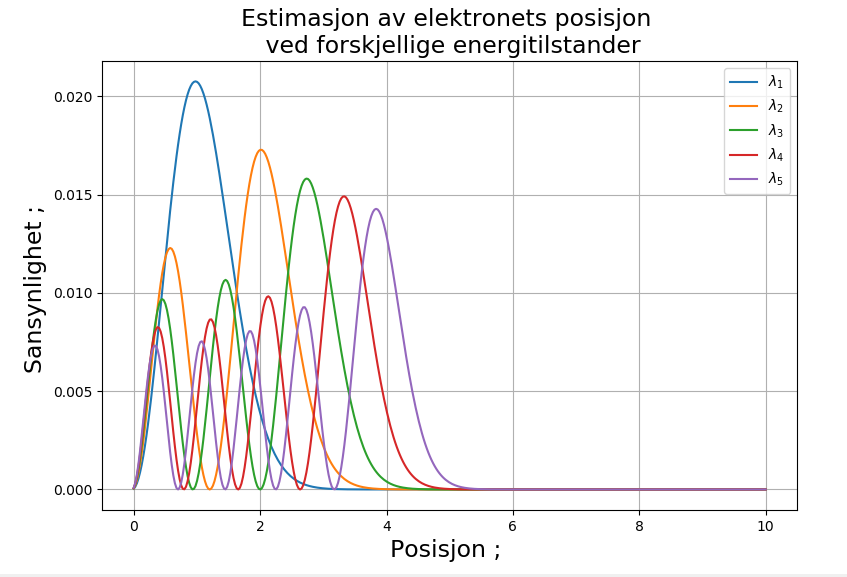

#### Figur(2)
Her har vi plottet egenvektorene vi fikk ut fra programmet som løser for ett elektron. Vi har sortert egenverdiene og egenvektorene slik at vi får de minste egenverdiene først med tilhørende egenvektorer, og vi har plottet for de fem første. På y-aksen har vi sannsynlighet og på x-aksen har vi posisjon til elektronet.

### Resultater fra to elektroner

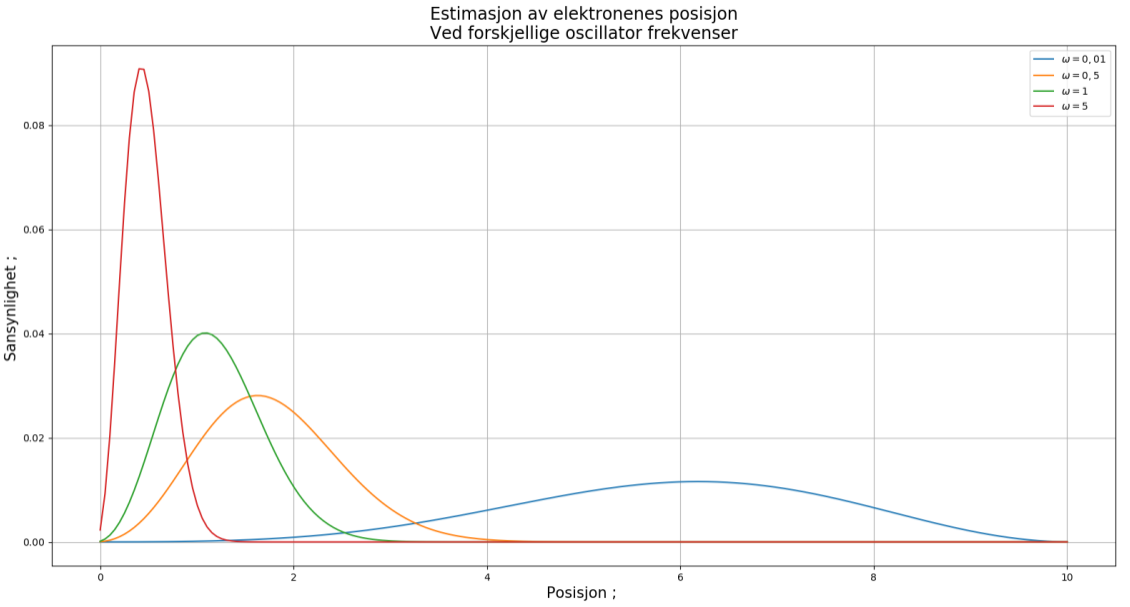


#### Figur(3)
Her plotter vi den første egenvektoren som vi får ut av programmet som løser for to elektroner. Vi har igjen sortert egenverdiene slik at den minste er først, og har tilhørende egenvektor. I tillegg har vi plottet denne fire ganger med forskjellig oscillerende frekvens. På y-aksen har vi sannsynlighet og på x-aksen har vi posisjon. Vi har simulert med N = 200.

Vi testet også for oscillerende frekvens = 0.25 og fikk ut at den første egenverdien var lik 1.25.

# Diskusjon

### Numerisk presisjon og effektivitet
Vi ser ut fra resultatene våre for bjelken (figur 1 og tabell 1) at toleransern for de ikke-diagonale elementene når vi roterer har relativ liten innvrikning på nøyaktigheten av resultatene når vi setter N til 200. Når det kommer til tidsbruken ved forskjellige toleranser ser vi at vi får en mer effektiv kode, til en svært liten kostnad av presisjon. Likevel er vi ikke helt sikker på hvordan presisjonen vil utvikle seg med andre matriser og størrelser for større toleranser, selv om det ser ut som vi kan senke toleransen en del, i forhold til toleransen på $10^{-8}$ vi har brukt ellers i oppgaven.

Vi ser derimot fra resultatene til et elektron (tabell 2) at strørrelsen til matrisen har en enorm betydning på presisjonen til resultatene, men at dette går på bekostning av tid. Vi ser allerede at ved N = 100 ser resultatene gode ut, men hvis vi skal opp til 4 ledene siffers presisjon må vi bruke opp mot N = 200. Hvis vi ser på tidsforbruket til N = 100 og N = 200 ser vi at ved en dobling av N gir oss omtrent en 20 dobling av tidsforbruket. For N = 200 er dette en greit tid å forholde seg til, men om vi dobler N en eller to ganger til så begynner det å bli vansklig å simulere av rent praktiske årsaker. 

Hvis vi igjen ser på resultatene våre fra simuleringene til bjelken (tabell 1) ser vi at Armadillos metode virker ekstremt raskt, og mye raskere enn vår Jacobi rotasjons metode. Dette kan komme av at vi har en relativt lite opptimalisert kode, i forhold til Armadillos sin version, og at ved optimalisering av koden vil vi da kunne få kode som løser problemene raskere. Likevel er ikke Jacobi rotasjon en særlig effektiv metode, så implementasjon av en annen algoritme kunne vært nyttig. metoden gir oss likevel stabile resultater for N $_=^>$ 100 og innen rimelig tid for N < 300. 

### Simulering av bjelke
Vi forventet at bjelken skal bevege seg opp og ned, siden det virker en kraft på endepunktene. Vi kjenner ikke de fysikalske egenskapene til bjelken så resulatet plottet viser oss hvordan bjelker generellt kan bevege seg for spesefikke forhold mellom matrial konstanten $\gamma$, kraften F som blir påført i endepunktene og kvadratet av lengden til bjelken. Ut fra plottet ser vi at egenverdiene viser oss hva som skal til for å oppnå stående bølger. Den første egenverdien gir oss en stående bløge, den andre gir oss 2 stående bølger osv.  

### Simulering av ett elektron
Hvis vi nå ser på resultatet fra estimasjonen til posisjonen for et elektron (figur 2), så ser vi at for den minste energitilstanden til elektronenet $\lambda_1$ får vi en relativt god estimasjon på hvor elektronet faktisk befinner seg. I stor motsetning til de høyere energitilstandene, der vi får flere topper med forskellige størrelser, noe som stemmer godt med elektronsky modellen. Vi observerer også at jo høyere energitilstand desto flere topper får vi, dette betyr at det blir svært komplisert å gjøre beregninger for høyere energitilstander.

### Simulering av to elektroner

Når vi ser på estimasjonen av posisjonen til de 2 elektronenene, så ser vi kun på grunntilstanden og som forventet får vi kun 1 topp per estimasjon. Vi ser at ettersom vi øker oscillasjons frekvensen så minker avstanden til elektronene fra nullpunktet, dette virker naturlig for ved konstant spinn så vil frekvensen øke dersom man minker radiusen til omdreiningspunktet.

Vi har sammenliknet med ett av egenverdiene til Taut i hans artikkel. Vi satte oscillasjons frekvensen lik 1/4, samme som Taut har gjort. Da fikk vi at den første sorterte egenverdien ble 1.25, og Taut fikk at dette ble 0.625. Hvis vi ganger Taut sin egenverdi med 2, ser vi at $0.625*2 = 1.25$, som betyr at vi fikk den samme løsningen som Taut i dette tilfellet.

### Forventinger
Når vi bruker Jacobi rotasjon forventer vi at for hver iterasjon så skal ett ikke-diagonalt element fjernes. Dette betyr altså at for en 5x5 matrise vil vi forvente 8 iterasjoner. Men numerisk får vi ikke dette, ser vi på resultatene fra ett elektron ser vi at en 5x5 matrise brukte 17 iterasjoner. Dette sannsynligvis på grunn av toleransen. Når vi gjør dette numerisk får vi ikke alle elementene til å bli null med en gang, de blir bare mindre. Og hvis et element er over toleransen må vi iterere igjen. Dette betyr altså at hvis programmet kunne satt ett ikke-diagonale element til null med en gang istedenfor å bare gjøre det mindre ville vi ha fått 8 iterasjoner her istedenfor 17.

Vi forventer at bjelken skal bevege seg opp og ned når vi påfører et arbeid på den. Vi vet ikke hvor elastisk den er,  men vi vet at den burde få noen små utslag uansett. Dette kan vi se at skjer i plottet, vi har svingninger på y-aksen.

### Kode
Vi har brukt mye av den samme koden for å løse de tre forskjellige problemene. Den største forskjellen er at vi har byttet på diagonal elementene på matrisen og grensebetingelsene til rho. Dette er fordi vi måtte definere aproksimere rho i uendeligheten for programmene som løser for ett elektron og for to elektroner. Vi approksimerte uendelig ved å sette rho til 10 og så sette N til et høyt tall. Dette er fordi da får vi flere punkter på et lite intervall, som gjør at vi får en bedre aproksimasjon til egenverdiene og egenvektorene. Ser vi på tabellen for ett elektron kan vi se at når vi øker n så kommer vi nærmere den analytiske egenverdien. Problemet med dette er at når vi gjør dette for f.eks n = 200 så får vi en 200x200 matrise. Dette kan ta veldig lang tid, spesielt med Jacobi metoden. Den første numeriske egenverdien starter ganske nærme den analytiske egenverdien, men vi ser at vi får en gradvis større feil på de neste egenverdiene. Vi ser også at vi bruker flere iterasjoner for større n, men dette er forventet siden det er flere ikke-diagonale elementer å forandre på.

Vi ser også at resultatene på egenverdiene som vi får ut fra bjelken er identiske med Armadillo sin eig_sym funksjon når toleransen vår er liten nok. Den største forskjellen her er at Armadillo sin funksjon er raskere enn vår funksjon. Dette er mest sannsynlig fordi de ikke bruker samme numerisk metode som vi gjør for å finne egenverdier og egenvektorer, Jacobi metoden er en "idiotsikker" metode, men det er ikke den raskeste, spesielt for store matriser.  


### Gjennomføring
Prosjektet har vært generelt vellyket, vi kom tidlig i gang med projektet som følge av lab-timene på torsdager. I tillegg har vi samarbeidet svært godt i løpet av projeket. Oppgavene har vært utfordrene, men takket være god støtte på Piazza og lab-timene har projektet vært svært læringsrikt. Vi har rotet litt med merge conflicts i Git, og skulle kanskje hatt litt mer struktur i Git tidlig i oppgaven, men ellers er vi ganske fornøyde. Ingen av oss har hatt kvantemekanikk, men oppgavene om elektroner gikk greit ettersom det bare var å skalere og løse et egenverdi problem.
 

# Konklusjon

# Referanser


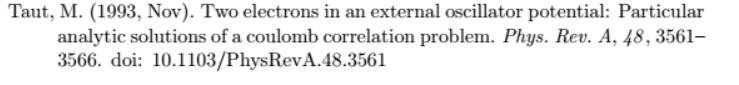
$ \hspace{5cm}$[https://journals.aps.org/pra/abstract/10.1103/PhysRevA.48.3561](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.48.3561)

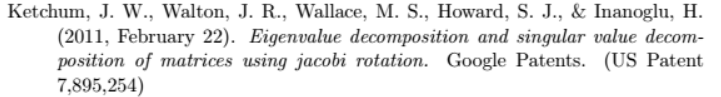

$\hspace{5cm} $[https://patentimages.storage.googleapis.com/00/1f/fa/616a49db59bf2c/US7895254.pdf](https://patentimages.storage.googleapis.com/00/1f/fa/616a49db59bf2c/US7895254.pdf)

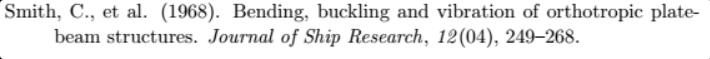

$\hspace{5cm} $[https://www.onepetro.org/journal-paper/SNAME-JSR-1968-12-4-249](https://www.onepetro.org/journal-paper/SNAME-JSR-1968-12-4-249)